Choosing the opitmal number of epochs to train a neural network

Overfitting means that the model gives high accuracy on the training set (sample data) but fails to achieve good accuracy on the test set. In other words, the model **loses generalization capacity** by overfitting the training data. 
* To mitigate (decrease) overfitting and to increase the generalization capacity of the neural network, the model should be trained for an optimal number of epochs. 

A part of the training data is dedicated to the validation of the model, to check the performance of the model after each epoch of training. Loss and accuracy on the training set as well as on the validation set are monitored to look over the epoch number after which the model starts overfitting.

### keras.callbacks.callbacks.EarlyStopping()
Either loss/accuracy values can be monitored by the Early stopping call back function. If the loss is being monitored, training comes to halt when there is an increment observed in loss values. Or, If accuracy is being monitored, training comes to halt when there is a decrement observed in accuracy values.

**Reference**

https://www.geeksforgeeks.org/choose-optimal-number-of-epochs-to-train-a-neural-network-in-keras/

In [1]:
import tensorflow as tf
import keras
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist
from keras import models, layers

In [2]:
# Loading data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images.shape

11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

In [3]:
train_images.shape

(60000, 28, 28)

OR you can add dimensions (to provide batch parameter for Conv model) using reshape method as below

In [4]:
# Reshaping data-Adding number of channels as 1 (Grayscale images)
train_images = train_images.reshape((train_images.shape[0],
                                     train_images.shape[1],
                                     train_images.shape[2], 1))  # Gray scale index - If images were RGB, there would be 3 channels


test_images = test_images.reshape((test_images.shape[0],
                                   test_images.shape[1],
                                   test_images.shape[2], 1))

In [5]:
# Scaling down pixel values
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255
 
# Encoding labels to a binary class matrix
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [6]:
INPUT_SHAPE = (28,28,1)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=INPUT_SHAPE),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [7]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
val_images = train_images[:10000]
partial_images = train_images[10000:]
val_labels = y_train[:10000]
partial_labels = y_train[10000:]

### Create EarlyStopping object

* monitor: The value to be monitored by the function should be assigned. It can be "**validation loss**" or "**validation accuracy**".

* mode: It is the mode in which change in the quantity monitored should be observed. This can be '**min**' or '**max**' or '**auto**'. When the monitored value is loss, its value is '**min**'. When the monitored value is accuracy, its value is '**max**'. When the mode is set is '**auto**', the function automatically monitors with the suitable mode.

* min_delta: The minimum value should be set for the change to be considered i.e., Change in the value being monitored should be higher than '**min_delta**' value.

* patience: Patience is the number of epochs for the training to be continued after the first halt. The model waits for patience number of epochs for any improvement in the model.

* verbose: Verbose is an integer value-0, 1 or 2. This value is to select the way in which the progress is displayed while training.

Verbose = 0: Silent mode-Nothing is displayed in this mode.

Verbose = 1: A bar depicting the progress of training is displayed.

Verbose = 2: In this mode, one line per epoch, showing the progress of training per epoch is displayed.

* restore_best_weights: This is a boolean value. True value restores the weights which are optimal.


In [16]:
from keras import callbacks

#earlystopping = callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True, verbose=2)
earlystopping = callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=5, restore_best_weights=True, verbose=2)

### Fit the model

In [17]:
history = model.fit(partial_images, partial_labels, batch_size=128, epochs=25, validation_data=(val_images, val_labels), callbacks=[earlystopping])

Epoch 1/25
391/391 [==============================] - 2s 6ms/step - loss: 0.0043 - accuracy: 0.9988 - val_loss: 0.0497 - val_accuracy: 0.9898
Epoch 2/25
391/391 [==============================] - 2s 6ms/step - loss: 0.0037 - accuracy: 0.9989 - val_loss: 0.0519 - val_accuracy: 0.9896
Epoch 3/25
391/391 [==============================] - 2s 5ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0530 - val_accuracy: 0.9906
Epoch 4/25
391/391 [==============================] - 2s 5ms/step - loss: 0.0024 - accuracy: 0.9993 - val_loss: 0.0581 - val_accuracy: 0.9903
Epoch 5/25
391/391 [==============================] - 2s 5ms/step - loss: 0.0023 - accuracy: 0.9993 - val_loss: 0.0582 - val_accuracy: 0.9900
Epoch 6/25
391/391 [==============================] - 2s 5ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.0667 - val_accuracy: 0.9898
Epoch 7/25
391/391 [==============================] - 2s 5ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.0616 - val_accuracy: 0.9907
Epoch 

Training process stopped by EarlyStopping due to no change in validation loss

<Axes: >

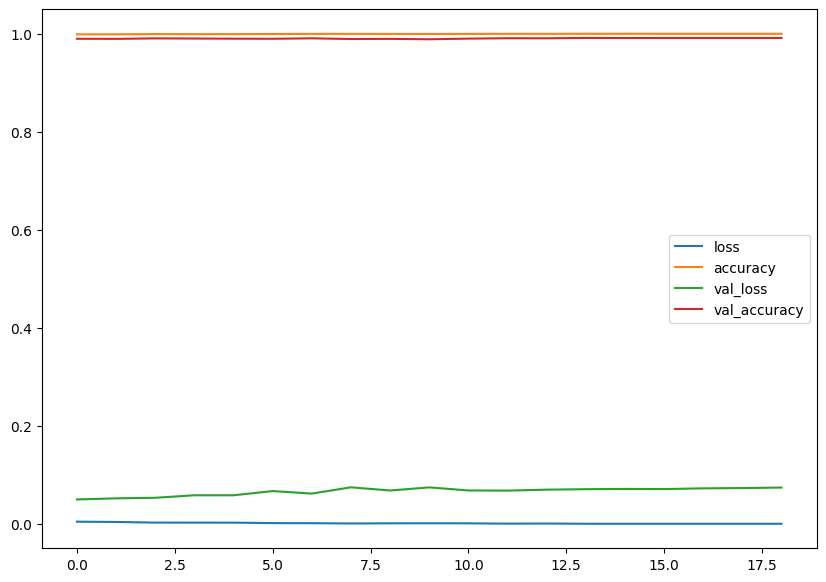

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(10, 7))